In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [16]:
mrv1 = pd.read_csv("marvel_box_office.csv")
mrv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Movie                             66 non-null     object 
 1   Release Date                      66 non-null     object 
 2   Release Month                     66 non-null     object 
 3   Release Day                       66 non-null     int64  
 4   Release Year                      66 non-null     int64  
 5   Ownership                         66 non-null     object 
 6   Domestic Box Office               66 non-null     int64  
 7   Inflation Adjusted Domestic       66 non-null     int64  
 8   International Box Office          66 non-null     int64  
 9   Inflation Adjusted International  66 non-null     float64
 10  Worldwide Box Office              66 non-null     int64  
 11  Inflation Adjusted Worldwide      66 non-null     float64
 12  Opening We

([<matplotlib.patches.Wedge at 0x190864ef390>,
 [Text(6.735557395310444e-17, 1.1, 'Marvel Studios'),
  Text(-0.7203467861122991, -0.8313245501834298, 'Sony Pictures'),
  Text(0.6380626589989972, -0.8960335056185844, '20th Century Fox'),
  Text(1.0395009306980727, -0.35977467264642304, 'Lionsgate Films'),
  Text(1.095019124323497, -0.10456154821827258, 'New Line Cinema')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-0.39291642878852673, -0.4534497546455071, '27.3%'),
  Text(0.34803417763581657, -0.4887455485192278, '15.2%'),
  Text(0.5670005076534941, -0.19624073053441257, '4.5%'),
  Text(0.5972831587219074, -0.057033571755421404, '3.0%')])

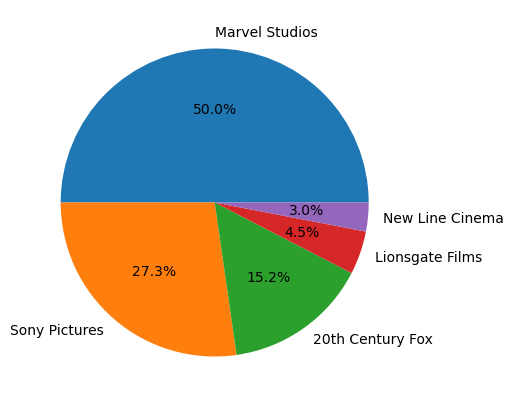

In [17]:
plt.figure(figsize=[10,5])
data = mrv1['Ownership'].value_counts()
lb = mrv1['Ownership'].unique()
plt.pie(data,labels=lb,autopct='%1.1f%%')

c:\Users\walo1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\walo1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ownership', ylabel='Worldwide Box Office'>

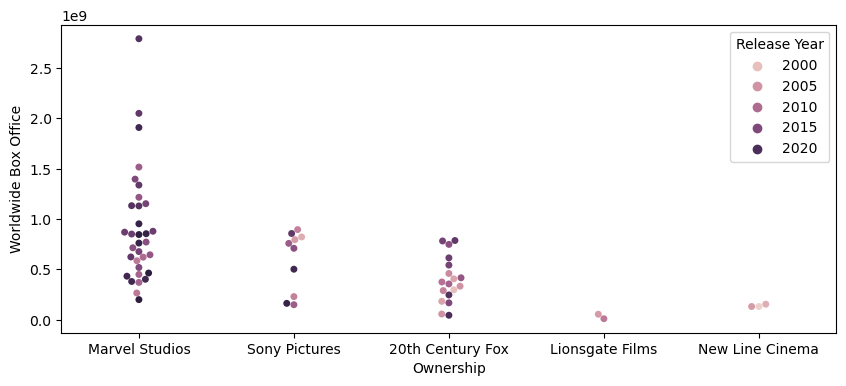

In [18]:
plt.figure(figsize=[10,4])
sns.swarmplot(data=mrv1,x='Ownership',y='Worldwide Box Office',hue='Release Year')


c:\Users\walo1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\walo1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


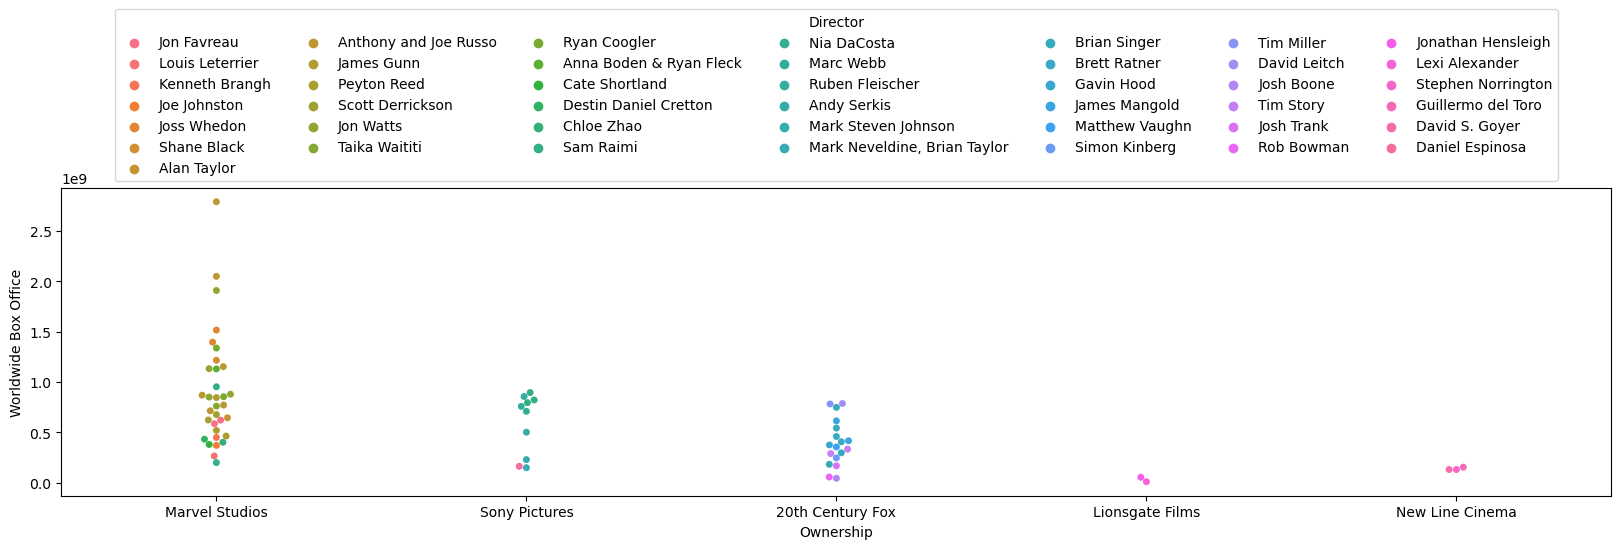

In [19]:
plt.figure(figsize=[20,4])
ax= sns.swarmplot(data=mrv1,x='Ownership',y='Worldwide Box Office',hue='Director')
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=7,frameon=True)


c:\Users\walo1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\walo1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


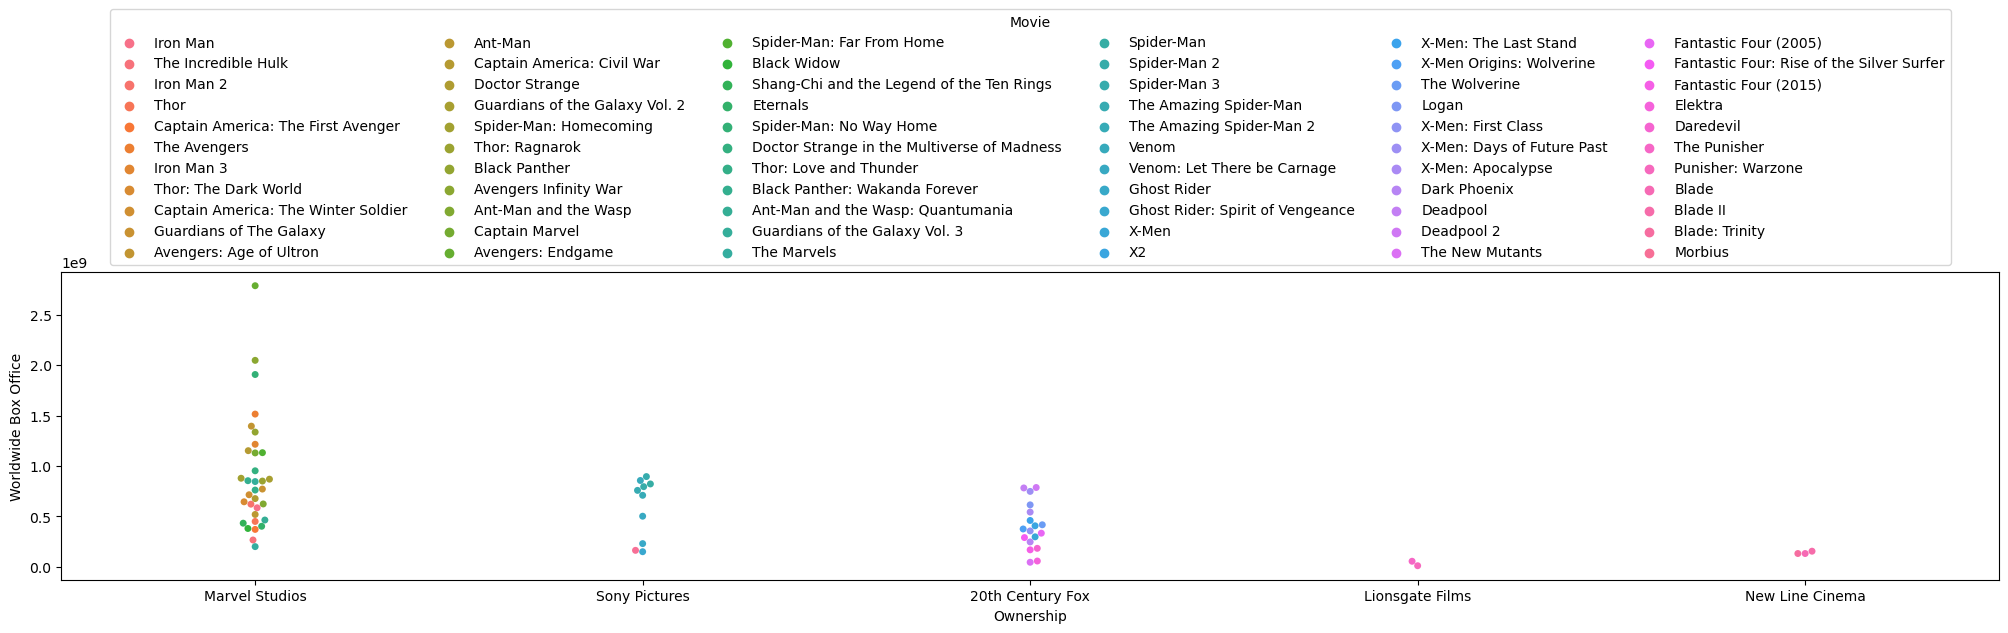

In [20]:
plt.figure(figsize=[25,4])
ax= sns.swarmplot(data=mrv1,x='Ownership',y='Worldwide Box Office',hue='Movie')
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=6,frameon=True)

In [21]:
x = mrv1[[ 'Domestic Box Office', 'IMDb Score','Meta Score', 'Tomatometer', 'Rotten Tomato Audience Score',]]
y = mrv1['International Box Office']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
learn = LinearRegression()
learn.fit(x_train,y_train)
pre = learn.predict(x_test)
pre



array([1.17728179e+09, 2.81050857e+08, 8.47497568e+07, 1.32338051e+08,
       4.32408566e+08, 9.02261748e+08, 2.87669875e+08, 1.48382522e+08,
       2.39648187e+08, 2.57868308e+08, 3.35053192e+08, 2.32341987e+08,
       1.74764200e+08, 3.01587358e+08, 5.76322923e+08, 3.01490995e+08,
       4.57091726e+08, 1.71445948e+08, 6.40755299e+08, 1.78803812e+08])

In [22]:
print("Train Score: " + str(learn.score(x_train,y_train)))
print("Test Score: " + str(learn.score(x_test,y_test)))

Train Score: 0.7742544789240584
Test Score: 0.7689585725592601


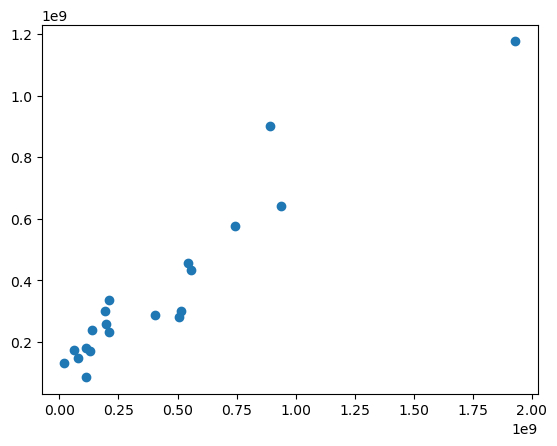

In [23]:
plt.scatter(y_test,pre)
